In [5]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, scatter, show
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import signal
from scipy.signal import butter, lfilter
from scipy.signal import freqz

import pickle
Sliced_ArrTotal_1 = pickle.load( open( "Sliced_ArrTotal_1.p", "rb" ) )
Sliced_TimeTotal_1 = pickle.load( open( "Sliced_TimeTotal_1.p", "rb" ) )
Sliced_ChairTotal_1 = pickle.load( open( "Sliced_ChairTotal_1.p", "rb" ) )
Sliced_NeckTotal_1 = pickle.load( open( "Sliced_NeckTotal_1.p", "rb" ) )

In [2]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

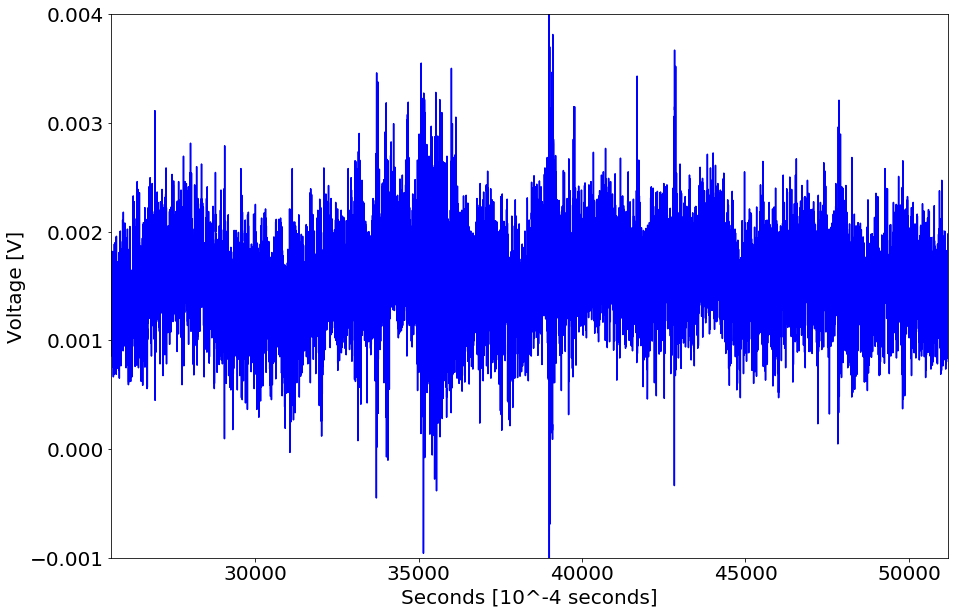

In [37]:
i = 7
plt.figure(figsize=(15,10))
plt.plot(Sliced_ChairTotal_1[1+i],'blue')
# plt.xlim([63400,64200])
plt.xlim([25600*(a),25600*(a+1)])
plt.ylim([-0.001,0.004])
plt.xlabel('Seconds [10^-4 seconds]',size=20)
plt.ylabel('Voltage [V]',size=20)
plt.tick_params(labelsize=20)

# plt.figure(i+1)
# plt.plot(Sliced_ChairTotal_1[30+i])

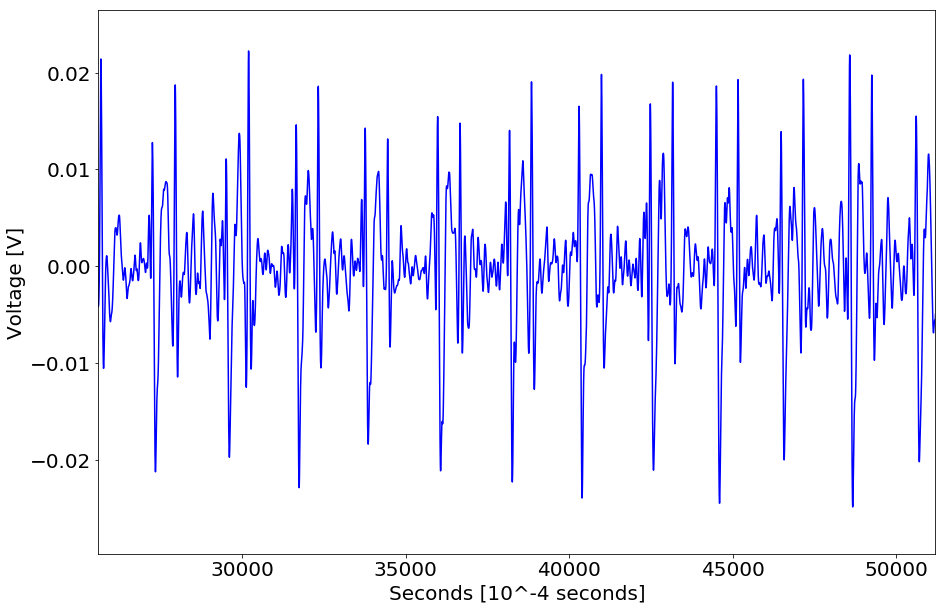

In [34]:
fs = 10240
lowcut = 10
highcut = 90
order = 2

#get filtered data

for i in range(1):
    filtered_data = butter_bandpass_filter(Sliced_NeckTotal_1[1], lowcut, highcut, fs, order)
    plt.figure(figsize=(15,10))
    plt.plot(filtered_data, 'blue')
#    plt.ylim([-0.0005,0.0005])
    plt.xlabel('Seconds [10^-4 seconds]',size=20)
    plt.ylabel('Voltage [V]',size=20)
    plt.tick_params(labelsize=20)
    a = 1
    plt.xlim([25600*(a),25600*(a+1)])
